In [147]:
import numpy as np
import pandas as pd

In [148]:
TeacherStruct={}
numteachers=82
for i in [(i) for i in list(range(0,numteachers))]:
    TeacherStruct[i]={'Schedule':['On','On','On','On','On','On','On','On'],
                           'Department':'Misc',
                           'Home Rooms':[None,None]}
for i in TeacherStruct.keys():
    if i<5:
        TeacherStruct[i]['Department']="English"
    else:
        TeacherStruct[i]['Department']="Misc"    

In [149]:
countclassrooms=73
tennentcount=dict.fromkeys(range(1,countclassrooms+1), 0)
counthomerooms=2
for i in TeacherStruct:
    picks=[]
    for j in range(0,counthomerooms):
        rooms=[i for i in tennentcount.keys() if tennentcount[i]<counthomerooms+1]
        pick=int(np.random.choice(rooms,1,replace=False))
        tennentcount[pick]+=1
        picks.append(pick)
    TeacherStruct[i]['Home Rooms']=picks

In [167]:
TeacherStruct

{0: {'Schedule': [31, 31, 'Off', 31, 40, 'Off', 'Off', 31],
  'Department': 'English',
  'Home Rooms': [31, 40]},
 1: {'Schedule': [53, 53, 'Off', 53, 'Off', 'Off', 53, 53],
  'Department': 'English',
  'Home Rooms': [28, 53]},
 2: {'Schedule': [12, 12, 'Off', 'Off', 45, 12, 45, 'Off'],
  'Department': 'English',
  'Home Rooms': [45, 12]},
 3: {'Schedule': [44, 'Off', 'Off', 44, 44, 'Off', 60, 44],
  'Department': 'English',
  'Home Rooms': [44, 60]},
 4: {'Schedule': ['Off', 6, 'Off', 'Off', 6, 6, 73, 73],
  'Department': 'English',
  'Home Rooms': [73, 6]},
 5: {'Schedule': [18, 'Off', 17, 17, 'Off', 18, 18, 'Off'],
  'Department': 'English',
  'Home Rooms': [17, 18]},
 6: {'Schedule': [4, 4, 34, 34, 34, 'Off', 34, 'Off'],
  'Department': 'Misc',
  'Home Rooms': [4, 34]},
 7: {'Schedule': [26, 26, 'Off', 26, 56, 56, 'Off', 26],
  'Department': 'Misc',
  'Home Rooms': [56, 26]},
 8: {'Schedule': [50, 'Off', 26, 50, 26, 'Off', 26, 50],
  'Department': 'Misc',
  'Home Rooms': [26, 50]},

In [150]:
SimFrame=pd.DataFrame()
#teacherslist=list(range(0,82))
for q in range(0,1000):

    confcounter={'0':0,'1':0,"2":0,"7":0}
    lunchcounter={'3':0,'4':0,"5":0,"6":0}
    stop=21
    schedules=[]

    for i in TeacherStruct:
    
        lunch=[]
    
        for j in list(lunchcounter.keys()):
            if lunchcounter[str(j)]<stop:
                lunch.append(int(j))
    
        schedule= ["On","On",'On',"On","On",'On',"On",'On']
    
        lt=np.random.choice(lunch,1)[0]
    
        schedule[lt]='Off'
        lunchcounter[str(lt)]+=1
    
        conf=[]
        
        for x in list(confcounter.keys()):
            if confcounter[str(x)]<stop:
                conf.append(int(x))
    
        co=np.random.choice(conf,1)[0]
    
        schedule[co]='Off'
        confcounter[str(co)]+=1
        
        if TeacherStruct[i]['Department']=='English':
            slots=[0,1,2,3,4,5,6,7]
            slots.remove(lt)
            slots.remove(co)
            englishbreak=np.random.choice(slots,1)[0]
            schedule[englishbreak]='Off'
            
    
        schedules.append(schedule)
        
    for a in range(0,len(schedules)):
        TeacherStruct[a]['Schedule']=schedules[a]
        
    periods=dict.fromkeys(['0','1','2','3','4','5','6','7'],list(range(1,74)))
    for i in periods:
        for j in TeacherStruct:
            notpicked=periods[i]
            possible=TeacherStruct[j]['Home Rooms']
            possible=[q for q in possible if q in notpicked]
        
            if TeacherStruct[j]['Schedule'][int(i)]=='Off':
                picked='Off'
            elif len(possible)!=0:
                picked=int(np.random.choice(possible,1))
            elif len(notpicked)!=0:
                picked=int(np.random.choice(notpicked,1))
            else:
                picked='Hallway'
    
        
            updated=[v for v in periods[i] if v!=(picked)]
            periods[i]=updated
            TeacherStruct[j]['Schedule'][int(i)]=picked
                
    Assigned=[TeacherStruct[i]['Schedule'] for i in TeacherStruct]
    
    SimFrame=SimFrame.append(pd.DataFrame(Assigned).assign(Simulation=q))

SimFrame['TeacherId']=SimFrame.index.values

In [151]:
#SimFrame.astype(str).drop(columns=['Simulation','TeacherId']).values.sum(axis=1)

In [152]:
scheduleseries=pd.Series((' '+SimFrame.astype(str)).drop(columns=['Simulation','TeacherId']).values.sum(axis=1)).str.split(' ').str[1:]

In [153]:
HomeFrame=pd.Series([TeacherStruct[i]['Home Rooms'] for i in TeacherStruct]).reset_index().rename(columns={'index':'TeacherId',
                                                                                                0:'Home Rooms'})

In [154]:
S2=SimFrame.\
    reset_index(drop=True).\
    assign(Colapsed=scheduleseries).\
    set_index('TeacherId').\
    join(HomeFrame.\
             set_index('TeacherId')).\
    reset_index()

In [155]:
S2

,TeacherId,0,1,2,3,4,5,6,7,Simulation,Colapsed,Home Rooms
0,0,31,Off,40,Off,40,Off,31,40,0,"[31, Off, 40, Off, 40, Off, 31, 40]","[31, 40]"
1,0,40,Off,31,Off,40,40,Off,31,1,"[40, Off, 31, Off, 40, 40, Off, 31]","[31, 40]"
2,0,31,Off,31,31,31,Off,Off,40,2,"[31, Off, 31, 31, 31, Off, Off, 40]","[31, 40]"
3,0,40,40,Off,40,Off,Off,40,31,3,"[40, 40, Off, 40, Off, Off, 40, 31]","[31, 40]"
4,0,31,40,40,31,31,Off,Off,Off,4,"[31, 40, 40, 31, 31, Off, Off, Off]","[31, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...
81995,81,1,Off,28,40,35,1,Off,67,995,"[1, Off, 28, 40, 35, 1, Off, 67]","[51, 1]"
81996,81,Off,45,51,38,Off,53,51,9,996,"[Off, 45, 51, 38, Off, 53, 51, 9]","[51, 1]"
81997,81,Off,51,1,52,Off,51,7,51,997,"[Off, 51, 1, 52, Off, 51, 7, 51]","[51, 1]"
81998,81,34,50,Off,31,51,Off,73,51,998,"[34, 50, Off, 31, 51, Off, 73, 51]","[51, 1]"


In [156]:
def bean(thelist):
    return [i  for i in thelist if i!='Off']

In [157]:
def bean2(thelist):
    return len(pd.Series(thelist).drop_duplicates())-1

In [146]:
F1=S2['Colapsed'].apply(bean2).value_counts(normalize=True).reset_index().sort_values('index').rename(columns={'index':'Rooms Used'}).reset_index(drop=True)

In [158]:
F2=S2['Colapsed'].apply(bean2).value_counts(normalize=True).reset_index().sort_values('index').rename(columns={'index':'Rooms Used'}).reset_index(drop=True)

In [159]:
F1

,Rooms Used,Colapsed
0,1,0.393317
1,2,0.137159
2,3,0.076402
3,4,0.071768
4,5,0.168524
5,6,0.152829


In [165]:
F1[F1['Rooms Used']>4]['Colapsed'].sum()

0.3213536585365854

In [166]:
F2[F2['Rooms Used']>4]['Colapsed'].sum()

0.12379268292682927

In [70]:
SimFrame['TeacherId']=SimFrame.index.values

In [71]:
SimFrame.drop(columns=['TeacherId'])

,0,1,2,3,4,5,6,7,Simulation
0,Off,62,6,6,Off,62,6,Off,0
1,34,Off,67,Off,67,Off,34,67,0
2,36,36,36,36,Off,65,Off,Off,0
3,59,Off,32,Off,59,Off,32,32,0
4,Off,37,Off,16,37,37,Off,37,0
...,...,...,...,...,...,...,...,...,...
77,72,Off,39,Off,72,67,28,21,99
78,7,Off,14,Off,14,34,14,14,99
79,12,12,Off,63,Off,9,12,12,99
80,69,41,60,Off,21,18,18,Off,99


In [262]:
pd.Series(TotalUsed).value_counts().reset_index().sort_values('index').rename(columns={'index':'Rooms Used',0:'Count'})

,Rooms Used,Count
1,2,18
0,3,46
2,4,14
4,5,2
3,6,2


<AxesSubplot:xlabel='Rooms Used'>

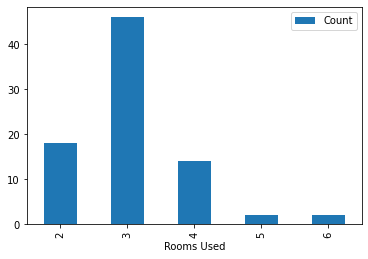

In [263]:
pd.Series(TotalUsed).value_counts().reset_index().sort_values('index').rename(columns={'index':'Rooms Used',0:'Count'}).plot.bar(x='Rooms Used',y='Count')

In [264]:
pd.Series(TotalUsed).value_counts(normalize=True).reset_index().sort_values('index').rename(columns={'index':'Rooms Used',0:'Percent'})

,Rooms Used,Percent
1,2,0.219512
0,3,0.560976
2,4,0.170732
4,5,0.024390
3,6,0.024390


In [193]:
pd.Series(NotIn)

0     5
1     5
2     5
3     5
4     5
     ..
77    6
78    6
79    6
80    6
81    6
Length: 82, dtype: int64

In [191]:
pd.Series(NotIn).value_counts()

0    49
2    12
1     9
3     7
4     3
5     2
dtype: int64

In [ ]:
for j in range(0,len(Assigned)):
    print(sum(pd.Series([i for i in Assigned[j] if i!='Off']).isin(TeacherStruct[j]['Home Rooms']))/len([i for i in Assigned[j] if i!='Off']))
    

In [167]:
[i for i in Assigned[0] if i!='Off']

[25, 25, 25, 25, 40]

In [ ]:
[TeacherStruct[i]['Schedule'] for i in TeacherStruct]